In [1]:
import sys
from matplotlib import style; style.use('seaborn-notebook')
sys.path.insert(0, '../')
from Models import Potts
from Models.FastIsing import Ising
import networkx as nx, matplotlib.pyplot as plt, numpy as np

n = 32
g = nx.grid_2d_graph(n, n)
# g = nx.erdos_renyi_graph(n, .2)
# g = nx.complete_graph(50)


# states = np.arange(0, 1000).tolist()
states = np.arange(0, 4).tolist()
m =  Potts.Potts(graph = g, \
                 agentStates = states,\
                 updateType = '.25')


# fig, ax = plt.subplots()
# ax.imshow(m.simulate(100))
# fig.show()

# m =  Ising(graph = g, updateType = '0.25')
temps = np.logspace(-2, np.log10(m.nNodes),  10)

print(temps)
mag, sus = m.matchMagnetization(temps, 10)

print(mag)

  0%|          | 0/10 [00:00<?, ?it/s]

[1.00000000e-02 3.60329646e-02 1.29837454e-01 4.67842838e-01
 1.68577644e+00 6.07435229e+00 2.18876921e+01 7.88678436e+01
 2.84184222e+02 1.02400000e+03]
Computing mag per t


100%|██████████| 10/10 [00:00<00:00, 19.58it/s]

[ 0.19938151  0.36298014  0.21177572  0.3972168   0.15384928  0.07469889
  0.01607259  0.01178385 -0.00506185  0.00147298]


/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


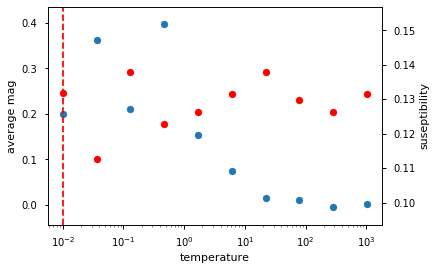

In [2]:
fig, ax = plt.subplots()
ax.scatter(temps, mag)
tax = ax.twinx()
tax.scatter(temps, sus, color = 'red')
ax.set(xlabel = 'temperature', ylabel = 'average mag')
tax.set_ylabel('suseptibility')
idx = np.argmin(abs(mag - .5 * mag.max()))
ax.axvline(temps[idx], color = 'red', linestyle = 'dashed')
# ax.set(xlim = (0, 20))
ax.set(xscale = 'log')
fig.show()

<IPython.core.display.Javascript object>


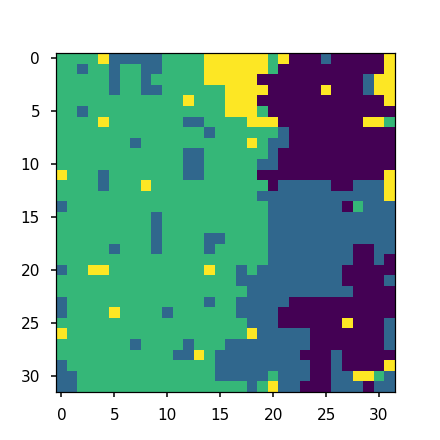

In [4]:
%matplotlib notebook
import ipywidgets as ipy

m.reset()
res = m.simulate(10000)

%matplotlib notebook
fig, ax = plt.subplots(figsize = (4, 4))
h = ax.imshow(res[0].reshape(n, n))
fig.show()

timeSlider = ipy.widgets.IntSlider(min = 0, max = res.shape[0] - 1, \
                                   value = 0, orientation = 'vertical')
# ipy.VBox([timeSlider, fig])
# @ipy.interact(time = timeSlider)
def update(time):
    h.set_data(res[time].reshape(n, n))
    fig.canvas.draw(); fig.canvas.flush_events()
#     fig.show()
widget = ipy.interactive(update, time = timeSlider)
layout = ipy.Layout(display = 'flex',\
                   flex_flow = 'row',\
                   justify_content = 'space-between',\
                   align_items = 'center',\
                   )
widgets = ipy.HBox(widget.children[::-1], layout = layout)
from IPython.display import display
display(widgets)

<IPython.core.display.Javascript object>


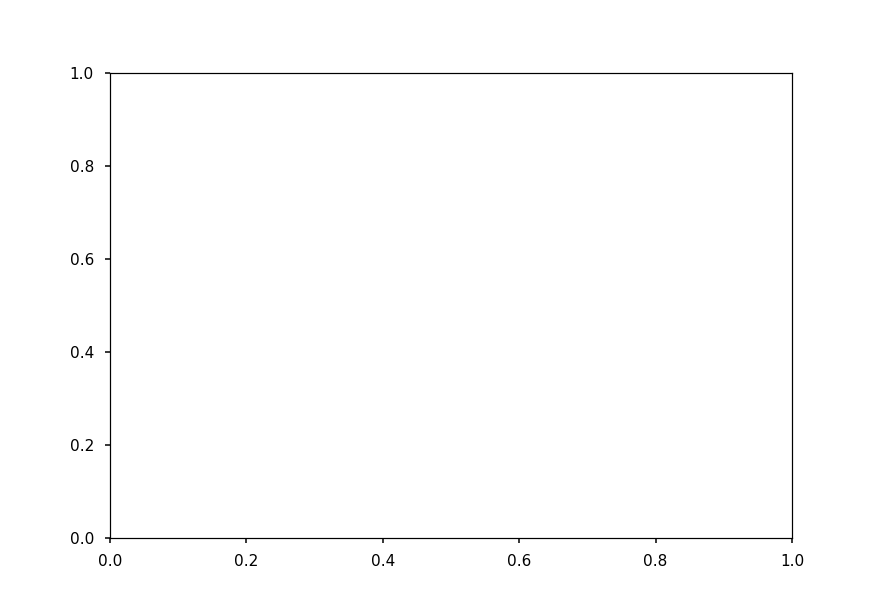

(240,)
(240, 2)


<IPython.core.display.Javascript object>


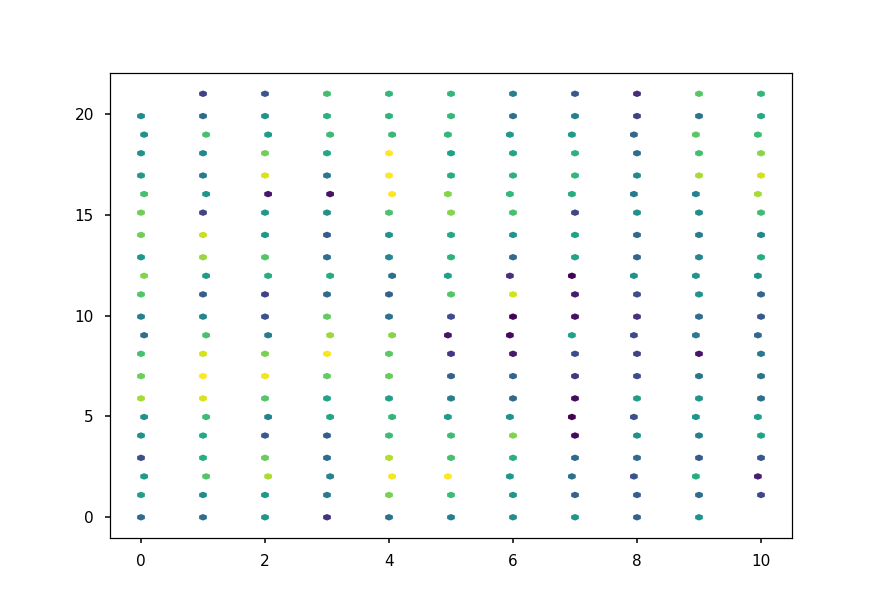

In [25]:
fig, ax = plt.subplots()
x = np.random.standard_normal(100)

x = np.random.rand(100)
y = 2 + 3  * x + 4 * np.random.standard_normal(x.size)


g = nx.hexagonal_lattice_graph(10, 10)
states = np.arange(0, 4).tolist()
m =  Potts.Potts(graph = g, \
                 agentStates = states,\
                 updateType = '.25')

y = m.simulate(100).mean(0)

print(y.shape)
x = np.asarray(g.nodes())
print(x.shape)
fig, ax = plt.subplots()
h = ax.hexbin(*x.T, C = y)
fig.show()

In [ ]:
%load_ext autoreload
%autoreload 2
from Models.FastIsing import Ising
from Toolbox import infcy

m = Ising(g)
m.matchMagnetization()

m.matchMagnetization()
snapshots = infcy.getSnapShots(m, 100)
infcy.runMC(m, snapshots, 10, 30)

In [ ]:
a = np.random.rand(10, 3)
np.isfortran(a)

In [ ]:
ratios = m.matched.get('ratios').items()
ratios = np.asarray(list(ratios))

print(ratios.shape, ratios)
fig, ax = plt.subplots()
ax.plot(*m.matched.get('mag')[[0, 1]], linestyle = '-', marker = '.')
ax.scatter(ratios[:,1], ratios[:, 0], color = 'red')
fig.show()

<IPython.core.display.Javascript object>


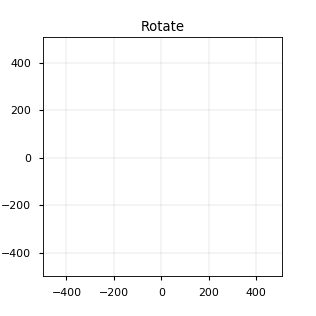

In [72]:
from IPython.display import display, clear_output
from ipywidgets import interact, fixed, IntSlider, HBox, Layout, Output, VBox
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook

def rotate(theta, xs, ys):
    new_xs = xs * np.cos(np.deg2rad(theta)) - ys * np.sin(np.deg2rad(theta))
    new_xs -= new_xs.min()
    new_ys = xs * np.sin(np.deg2rad(theta)) + ys * np.cos(np.deg2rad(theta))
    new_ys -= new_ys.min()
    return new_xs, new_ys

out = Output(layout={'width': '300px', 'height': '300px'})
xs = np.random.randint(0, 10, 50) 
ys = np.random.randint(0, 10, 50) 

fig, ax = plt.subplots(figsize = (4,4))
scat, = ax.plot(xs, ys, 'kx', markersize=1000)      
ax.grid(which='both', color='.25', lw=.1)
ax.set_aspect('equal'), ax.set_title('Rotate')
fig.show()
def update_plot(change): 
    theta = change['new'] # new slider value 
    with out: 
        clear_output(wait=True)
#         fig = plt.figure(figsize=(4,4))
#         ax = fig.add_subplot(111)
        new_xs, new_ys = rotate(theta, xs, ys) 
        scat.set_data(new_xs, new_ys)
#         ax.relim()
        ax.set_xlim(new_xs.min() - 500, new_xs.max() + 500)
        ax.set_ylim(new_ys.min() - 500, new_ys.max() + 500)
        fig.canvas.flush_events()
        fig.canvas.draw()
        fig.show()
#     print('Done')
        

slider = IntSlider(min=-180, max=180, step=5, value=0, orientation='vertical') 
slider.observe(update_plot, 'value')
update_plot({'new': slider.value}) 
display(HBox([out, slider]))

In [53]:
scat.get_data()

(array([3096.09499236, 2475.00597075,  308.93233691, 1326.82836733,
        2813.38657942, 1774.66214988, 3492.19212315, 1404.39336451,
        3442.54631398, 3332.86374183, 4599.15814818, 3147.21522143,
        2362.6726041 ,    0.        , 2293.18690692, 2275.84832669,
        3285.06535266, 4456.49459129, 4070.04509979, 2605.81275746,
        3110.04577139, 3386.16151338, 1559.57033914, 2078.23735517,
          55.41840385, 2414.72808089, 1860.82665465, 3068.25617175,
        3375.44768129, 3726.03008571, 4278.77544477, 3707.75492313,
        1983.23397348, 1821.6734105 ,  962.91880962,  330.39251767,
        1515.92111858, 5001.97169196,  297.26476484, 2359.1105161 ,
          48.82753983, 3555.26353058, 1743.79726365, 2395.96746538,
         968.67921984,  883.65584624,   65.14823393, 3461.1028036 ,
         553.68734575, 1070.49924996]),
 array([3284.63048565,    0.        , 1122.48564035, 2028.64935142,
         974.19893434, 4895.59021289, 4218.70706868,  820.81340593,
        